In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
#import libriaries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Import the Dataset from google drive
df = pd.read_csv("/content/drive/MyDrive/Group 1 Project/diabetes_prediction_dataset.csv")

In [4]:
# Overview of the Dataset
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [5]:
# The number of rows and columns
df.shape

(100000, 9)

In [6]:
# List of columns in the Dataset
df.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'smoking_history',
       'bmi', 'HbA1c_level', 'blood_glucose_level', 'diabetes'],
      dtype='object')

In [7]:
# Satistical Insight of the Dataset
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,100000.0,41.885856,22.516840,0.08,24.00,43.00,60.00,80.00
hypertension,100000.0,0.074850,0.263150,0.00,0.00,0.00,0.00,1.00
heart_disease,100000.0,0.039420,0.194593,0.00,0.00,0.00,0.00,1.00
bmi,100000.0,27.320767,6.636783,10.01,23.63,27.32,29.58,95.69
HbA1c_level,100000.0,5.527507,1.070672,3.50,4.80,5.80,6.20,9.00
blood_glucose_level,100000.0,138.058060,40.708136,80.00,100.00,140.00,159.00,300.00
diabetes,100000.0,0.085000,0.278883,0.00,0.00,0.00,0.00,1.00


In [8]:
#check for missing values
df.isna().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

In [9]:
# check for duplicates
df.duplicated().sum()

3854

### **Exploratory Data Analysis**

In [10]:
# Find the number of unique values in each column
for column in df.columns:
  print(df[column].value_counts())
  print('\n')

Female    58552
Male      41430
Other        18
Name: gender, dtype: int64


80.00    5621
51.00    1619
47.00    1574
48.00    1568
53.00    1542
         ... 
0.48       83
1.00       83
0.40       66
0.16       59
0.08       36
Name: age, Length: 102, dtype: int64


0    92515
1     7485
Name: hypertension, dtype: int64


0    96058
1     3942
Name: heart_disease, dtype: int64


No Info        35816
never          35095
former          9352
current         9286
not current     6447
ever            4004
Name: smoking_history, dtype: int64


27.32    25495
23.00      103
27.12      101
27.80      100
24.96      100
         ...  
58.23        1
48.18        1
55.57        1
57.07        1
60.52        1
Name: bmi, Length: 4247, dtype: int64


6.6    8540
5.7    8413
6.5    8362
5.8    8321
6.0    8295
6.2    8269
6.1    8048
3.5    7662
4.8    7597
4.5    7585
4.0    7542
5.0    7471
8.8     661
8.2     661
9.0     654
7.5     643
6.8     642
7.0     634
Name: HbA1c_level, dtype: int6

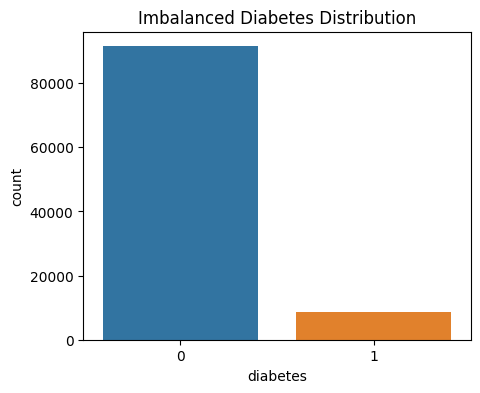

In [11]:
# Plot the distribution of Diabetes Category from the Data
plt.figure(figsize=(5,4))
sns.countplot(x='diabetes', data=df)
plt.title('Imbalanced Diabetes Distribution')
plt.show()

In [12]:
# Check columns data types
df.dtypes

gender                  object
age                    float64
hypertension             int64
heart_disease            int64
smoking_history         object
bmi                    float64
HbA1c_level            float64
blood_glucose_level      int64
diabetes                 int64
dtype: object

In [13]:
# convert age data type to int
df['age'] = df['age'].astype(int)

In [14]:
# re-check column data type
df.dtypes

gender                  object
age                      int64
hypertension             int64
heart_disease            int64
smoking_history         object
bmi                    float64
HbA1c_level            float64
blood_glucose_level      int64
diabetes                 int64
dtype: object

In [15]:
# Check the number of rows of age greater or equal to 20
df[df['age'] >= 20].shape[0]

80332

In [16]:
# Create a new Dataset as df_new with age greater or equal to 20
df_new = df[df['age'] >= 20]

In [17]:
# Remove rows on column gender with value Other
df_new = df_new.drop(df_new[df_new['gender'] == 'Other'].index, axis=0)

In [18]:
# Check the new number of rows in the dataset after the drop statement
df_new.shape[0]

80321

Observation: Imbalance Dataset based on the Diabetes column or categories.

In [19]:
# Value counts of Negative and Positive of Diabetes
df_new['diabetes'].value_counts()

0    71927
1     8394
Name: diabetes, dtype: int64

Task: Balancing Dataset by making Negative eqaul to Positive by slicing and concatenation to form a new Dataframe.

In [20]:
# Dataframe of diabetes eqaul to One
df_positive = df_new[df_new['diabetes'] == 1]

In [21]:
# Dataframe of diabetes eqaul to Zero
# print(df_new[df_new['diabetes'] == 0].sample(len(df_positive)).to_string())
df_negative = df_new[df_new['diabetes'] == 0].sample(len(df_positive))

In [22]:
# To validate the concatenated Dataframe rows
validate_rows = len(df_negative) + len(df_positive)
validate_rows

16788

In [23]:
# Concatenate the Positive and Negative Dataframe
df_clean = pd.concat([df_positive, df_negative]).sample(validate_rows)
df_clean

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
64014,Male,64,0,0,No Info,27.76,5.7,155,0
73017,Female,55,0,0,never,40.77,7.5,260,1
7058,Female,21,0,0,never,22.46,5.0,158,0
69413,Male,68,0,0,current,27.32,4.8,85,0
34557,Female,68,0,0,No Info,27.32,7.5,130,1
...,...,...,...,...,...,...,...,...,...
95334,Male,69,1,0,current,24.71,5.7,240,1
16721,Male,69,1,0,current,27.66,5.8,160,1
66713,Male,22,0,0,No Info,27.32,5.7,130,0
52007,Male,80,0,0,never,27.32,6.8,200,1


In [24]:
db_yes = df_clean[df_clean['diabetes']==1].shape[0]
mid_age = df_clean[(df_clean['age']>50) & (df_clean['diabetes']==1)].shape[0]
print(f"Total diabetes cases are {db_yes}, and {round((mid_age/db_yes) * 100,2)}% are over age 50")

Total diabetes cases are 8394, and 79.22% are over age 50


### **Data Visualization**

In [25]:
# print(plt.style.available)
plt.style.use('seaborn-v0_8')

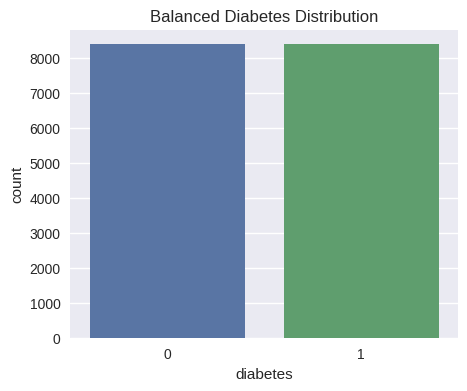

In [26]:
plt.figure(figsize=(5,4))
sns.countplot(x='diabetes', data=df_clean)
plt.title('Balanced Diabetes Distribution')
plt.show()

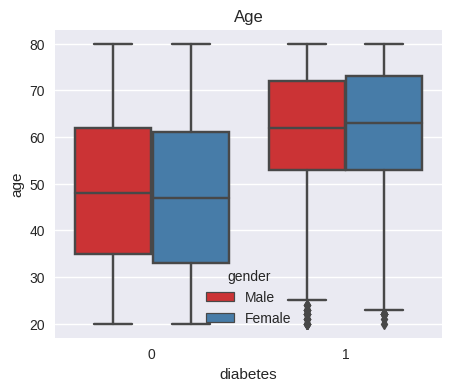

In [27]:
plt.figure(figsize=(5,4))
sns.boxplot(x='diabetes', y='age', hue='gender', palette='Set1', data=df_clean)
plt.title("Age")
plt.show()

In [28]:
# Check for the percentage distribution of each smoking history in the Dataset
for column in df_clean['smoking_history'].unique():
  total_count = df_clean['smoking_history'].shape[0]
  count = df_clean[df_clean['smoking_history'] == column].shape[0]
  result = (count/total_count) * 100
  print(f"A total of {count} of {column.upper()} was recorded from Smoking history.")
  print(f"Which made {round(result,2)}% of {total_count} recorded")
  print('\n')

A total of 3804 of NO INFO was recorded from Smoking history.
Which made 22.66% of 16788 recorded


A total of 6499 of NEVER was recorded from Smoking history.
Which made 38.71% of 16788 recorded


A total of 1866 of CURRENT was recorded from Smoking history.
Which made 11.12% of 16788 recorded


A total of 1276 of NOT CURRENT was recorded from Smoking history.
Which made 7.6% of 16788 recorded


A total of 2462 of FORMER was recorded from Smoking history.
Which made 14.67% of 16788 recorded


A total of 881 of EVER was recorded from Smoking history.
Which made 5.25% of 16788 recorded




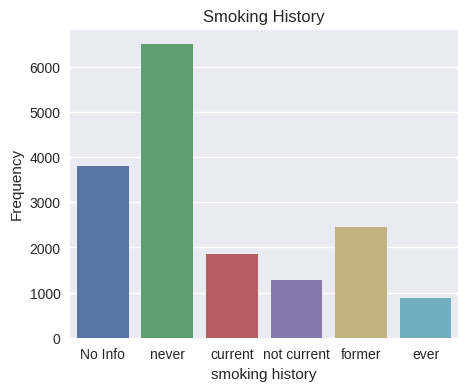

In [29]:
plt.figure(figsize=(5,4))
sns.countplot(x='smoking_history', data=df_clean)
plt.title("Smoking History")
plt.ylabel("Frequency")
plt.xlabel('smoking history')
plt.show()

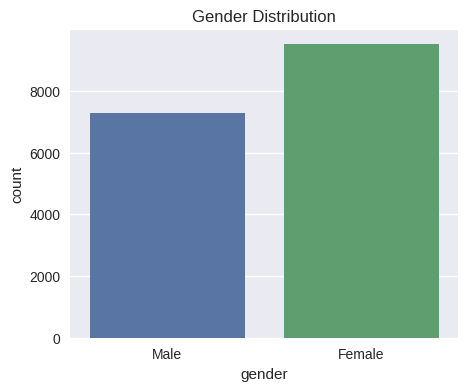

In [30]:
plt.figure(figsize=(5,4))
sns.countplot(x='gender', data=df_clean)
plt.title('Gender Distribution')
plt.show()

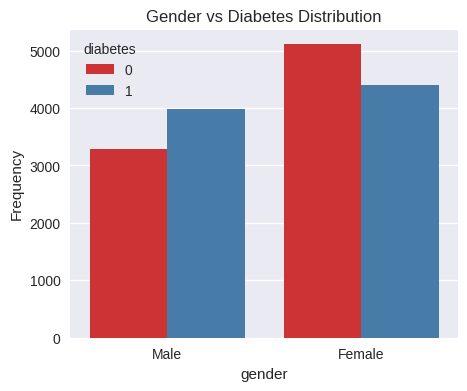

In [31]:
plt.figure(figsize=(5,4))
sns.countplot(x='gender', hue='diabetes', palette='Set1', data=df_clean)
plt.title('Gender vs Diabetes Distribution')
plt.ylabel("Frequency")
plt.show()

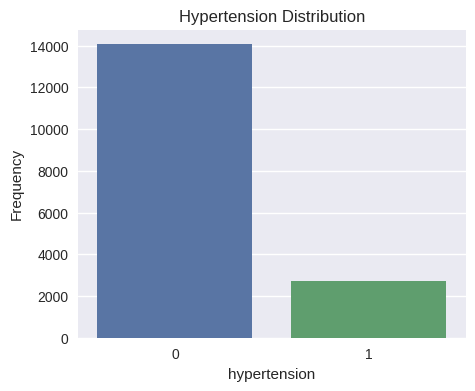

In [32]:
plt.figure(figsize=(5,4))
sns.countplot(x='hypertension', data=df_clean)
plt.ylabel('Frequency')
plt.title('Hypertension Distribution')
plt.show()

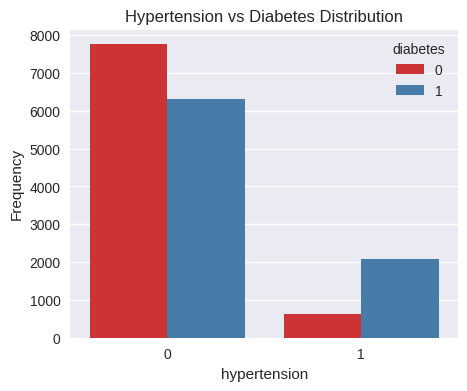

In [33]:
plt.figure(figsize=(5,4))
sns.countplot(x='hypertension', hue='diabetes', palette='Set1', data=df_clean)
plt.title('Hypertension vs Diabetes Distribution')
plt.ylabel('Frequency')
plt.show()

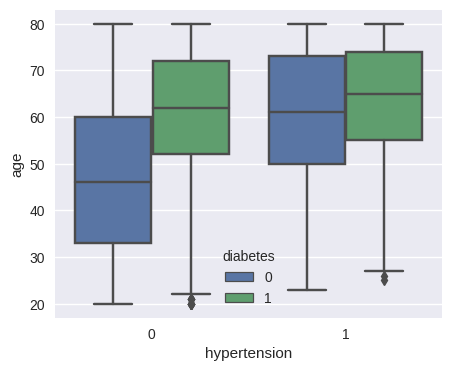

In [34]:
plt.figure(figsize=(5,4))
sns.boxplot(x='hypertension', y='age', hue='diabetes', data=df_clean)
plt.show()

In [35]:
for column in df_clean['age'].unique():
  column = int(column)
  total_count = df_clean['age'].shape[0]
  count = df_clean[df_clean['age'] == column].shape[0]
  result = (count/total_count) * 100
  print(f"A total of {count} of age {column} was recorded.")
  print(f"Which made {round(result,2)}% of total record of {total_count}")
  print('\n')

A total of 323 of age 64 was recorded.
Which made 1.92% of total record of 16788


A total of 347 of age 55 was recorded.
Which made 2.07% of total record of 16788


A total of 158 of age 21 was recorded.
Which made 0.94% of total record of 16788


A total of 303 of age 68 was recorded.
Which made 1.8% of total record of 16788


A total of 281 of age 45 was recorded.
Which made 1.67% of total record of 16788


A total of 334 of age 65 was recorded.
Which made 1.99% of total record of 16788


A total of 252 of age 70 was recorded.
Which made 1.5% of total record of 16788


A total of 214 of age 79 was recorded.
Which made 1.27% of total record of 16788


A total of 202 of age 77 was recorded.
Which made 1.2% of total record of 16788


A total of 332 of age 58 was recorded.
Which made 1.98% of total record of 16788


A total of 252 of age 43 was recorded.
Which made 1.5% of total record of 16788


A total of 178 of age 25 was recorded.
Which made 1.06% of total record of 16788


A total 

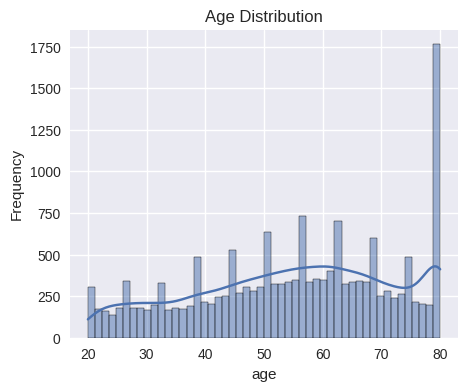

In [36]:
plt.figure(figsize=(5,4))
sns.histplot(x='age', bins=50, kde=True, data=df_clean)
plt.title("Age Distribution")
plt.ylabel('Frequency')
plt.show()

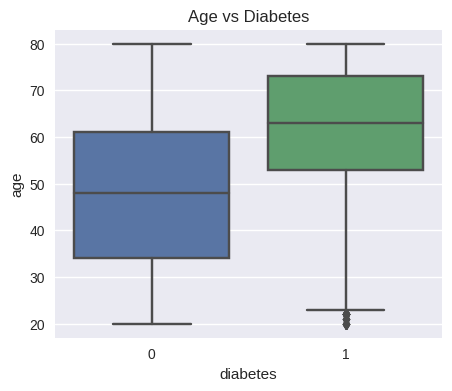

In [37]:
plt.figure(figsize=(5,4))
sns.boxplot(y='age', x='diabetes', data=df_clean)
plt.title("Age vs Diabetes")
plt.show()

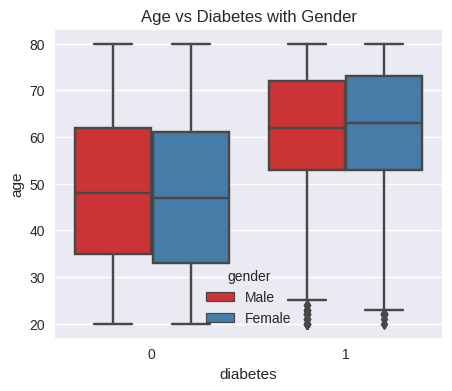

In [38]:
plt.figure(figsize=(5,4))
sns.boxplot(y='age', x='diabetes', hue='gender', palette='Set1', data=df_clean)
plt.title("Age vs Diabetes with Gender")
plt.show()

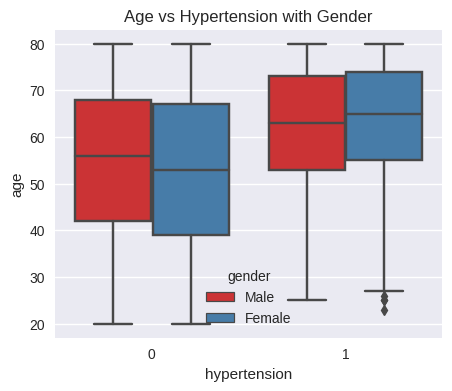

In [39]:
plt.figure(figsize=(5,4))
sns.boxplot(y='age', x='hypertension', hue='gender', palette='Set1', data=df_clean)
plt.title("Age vs Hypertension with Gender")
plt.show()

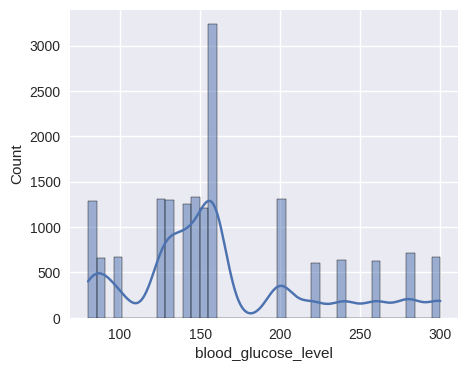

In [40]:
plt.figure(figsize=(5,4))
sns.histplot(x='blood_glucose_level', kde=True, data=df_clean)
plt.show()

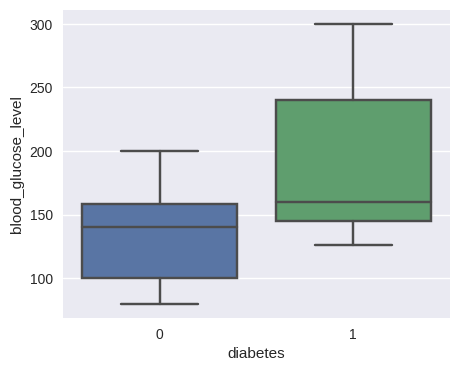

In [41]:
plt.figure(figsize=(5,4))
sns.boxplot(y='blood_glucose_level', x='diabetes', data=df_clean)
plt.show()

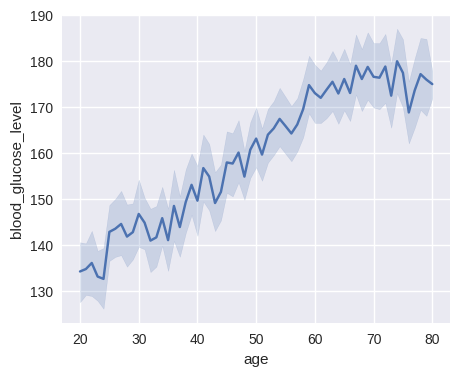

In [42]:
plt.figure(figsize=(5,4))
sns.lineplot(y='blood_glucose_level', x='age', data=df_clean)
plt.show()

**DATA FEATURING**

In [43]:
# Creating dict for one hot encoding

gender = {
    "Male":1,
    "Female":0
   }

smoking_history = {
    'never': 0,
    'No Info': 1,
    'ever': 2,
    'former': 3,
    'not current': 4,
    'current': 5
}


In [44]:
df_copy = df_clean.copy()

In [45]:
df_copy['gender'] = df_copy['gender'].map(gender)
df_copy['smoking_history'] = df_copy['smoking_history'].map(smoking_history)

In [46]:
df_copy

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
64014,1,64,0,0,1,27.76,5.7,155,0
73017,0,55,0,0,0,40.77,7.5,260,1
7058,0,21,0,0,0,22.46,5.0,158,0
69413,1,68,0,0,5,27.32,4.8,85,0
34557,0,68,0,0,1,27.32,7.5,130,1
...,...,...,...,...,...,...,...,...,...
95334,1,69,1,0,5,24.71,5.7,240,1
16721,1,69,1,0,5,27.66,5.8,160,1
66713,1,22,0,0,1,27.32,5.7,130,0
52007,1,80,0,0,0,27.32,6.8,200,1


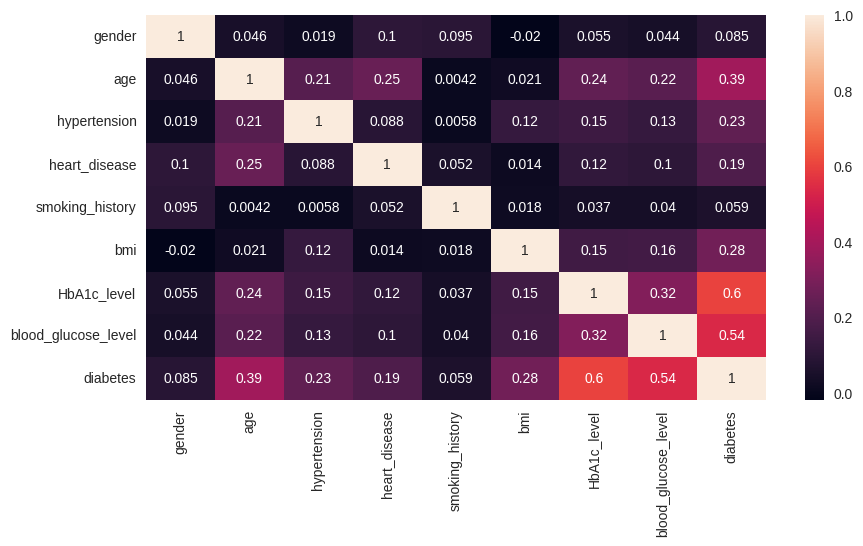

In [47]:
# data corr
plt.figure(figsize=(10,5))
corr = df_copy.corr()
sns.heatmap(corr, annot=True)
plt.show()

**Features Engineering**

In [48]:
df_copy

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
64014,1,64,0,0,1,27.76,5.7,155,0
73017,0,55,0,0,0,40.77,7.5,260,1
7058,0,21,0,0,0,22.46,5.0,158,0
69413,1,68,0,0,5,27.32,4.8,85,0
34557,0,68,0,0,1,27.32,7.5,130,1
...,...,...,...,...,...,...,...,...,...
95334,1,69,1,0,5,24.71,5.7,240,1
16721,1,69,1,0,5,27.66,5.8,160,1
66713,1,22,0,0,1,27.32,5.7,130,0
52007,1,80,0,0,0,27.32,6.8,200,1


In [49]:
# Scaling Dataset
scaling = ['age', 'smoking_history', 'bmi', 'HbA1c_level', 'blood_glucose_level']

In [50]:
# Importing Libraries
from sklearn.preprocessing import StandardScaler

In [51]:
# Perfomrm Scaling
sc =  StandardScaler()
X_scale = sc.fit_transform(df_copy[scaling])

In [52]:
# View Scaled Dataset
X_scale

array([[ 0.53426597, -0.35911562, -0.34801959, -0.36537984, -0.14796757],
       [ 0.00280343, -0.92798077,  1.52121571,  1.04234321,  1.69246788],
       [-2.00494393, -0.92798077, -1.10950668, -0.9128277 , -0.0953837 ],
       ...,
       [-1.94589254, -0.35911562, -0.41123738, -0.36537984, -0.58616648],
       [ 1.47908825, -0.92798077, -0.41123738,  0.49489536,  0.64079048],
       [-1.65063557, -0.92798077, -0.26325027, -2.08593025, -1.28728475]])

In [53]:
# Create a new dataframe with the scaled dataset
tranScale = pd.DataFrame(X_scale, columns=['age', 'smoking_history', 'bmi', 'HbA1c_level', 'blood_glucose_level'])

In [54]:
# Reset the index of the Dataframe
tranScale = tranScale.reset_index(drop=True)

tranScale

,age,smoking_history,bmi,HbA1c_level,blood_glucose_level
0,0.534266,-0.359116,-0.348020,-0.365380,-0.147968
1,0.002803,-0.927981,1.521216,1.042343,1.692468
2,-2.004944,-0.927981,-1.109507,-0.912828,-0.095384
3,0.770472,1.916345,-0.411237,-1.069241,-1.374925
4,0.770472,-0.359116,-0.411237,1.042343,-0.586166
...,...,...,...,...,...
16783,0.829523,1.916345,-0.786234,-0.365380,1.341909
16784,0.829523,1.916345,-0.362387,-0.287173,-0.060328
16785,-1.945893,-0.359116,-0.411237,-0.365380,-0.586166
16786,1.479088,-0.927981,-0.411237,0.494895,0.640790


In [55]:
# Create a subset from the orginal dataframe by droping the below columns
subset_df = df_copy.drop(['age', 'smoking_history', 'bmi', 'HbA1c_level', 'blood_glucose_level'], axis=1)

In [56]:
# Reset the index of the Dataframe
subset_df = subset_df.reset_index(drop=True)
subset_df

,gender,hypertension,heart_disease,diabetes
0,1,0,0,0
1,0,0,0,1
2,0,0,0,0
3,1,0,0,0
4,0,0,0,1
...,...,...,...,...
16783,1,1,0,1
16784,1,1,0,1
16785,1,0,0,0
16786,1,0,0,1


In [57]:
# Concatinate both dataframe on column base (axis)
featured_df = pd.concat([tranScale, subset_df], axis=1)

featured_df

,age,smoking_history,bmi,HbA1c_level,blood_glucose_level,gender,hypertension,heart_disease,diabetes
0,0.534266,-0.359116,-0.348020,-0.365380,-0.147968,1,0,0,0
1,0.002803,-0.927981,1.521216,1.042343,1.692468,0,0,0,1
2,-2.004944,-0.927981,-1.109507,-0.912828,-0.095384,0,0,0,0
3,0.770472,1.916345,-0.411237,-1.069241,-1.374925,1,0,0,0
4,0.770472,-0.359116,-0.411237,1.042343,-0.586166,0,0,0,1
...,...,...,...,...,...,...,...,...,...
16783,0.829523,1.916345,-0.786234,-0.365380,1.341909,1,1,0,1
16784,0.829523,1.916345,-0.362387,-0.287173,-0.060328,1,1,0,1
16785,-1.945893,-0.359116,-0.411237,-0.365380,-0.586166,1,0,0,0
16786,1.479088,-0.927981,-0.411237,0.494895,0.640790,1,0,0,1


In [58]:
# Import Libraries
from sklearn.model_selection import train_test_split

In [59]:
final_features = ['age', 'smoking_history', 'bmi', 'HbA1c_level', 'blood_glucose_level',
       'gender', 'hypertension', 'heart_disease']

In [60]:
# Creating X and Y variables
X = featured_df[final_features].values
y = featured_df.iloc[:,-1].values

In [61]:
# spliting dataset
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42)

**Machine Learning and Prediction**

In [62]:
# Import libraries

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import classification_report

In [63]:
# Training model
model = LogisticRegression()
model.fit(X_train, y_train)

# Create Prediction from trained model
y_pred = model.predict(X_test)

In [64]:
# Determine the score and confusion matrix
score = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

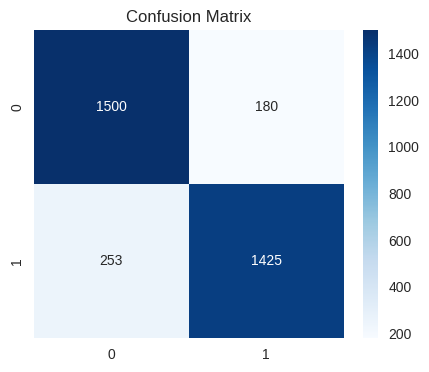

In [65]:
# Create a heatmap showing the confusion
plt.figure(figsize=(5,4))
sns.heatmap(cm, fmt='d', cmap='Blues', annot=True)
plt.title("Confusion Matrix")
plt.show()

In [66]:
# Print out the accuarcy score
print(f'Accuracy Score: {round(np.floor(score * 100))}%')

Accuracy Score: 87%


In [67]:
# Classification report
report = classification_report(y_test, y_pred)

In [68]:
# Print out the classification report
print(report)

              precision    recall  f1-score   support

           0       0.86      0.89      0.87      1680
           1       0.89      0.85      0.87      1678

    accuracy                           0.87      3358
   macro avg       0.87      0.87      0.87      3358
weighted avg       0.87      0.87      0.87      3358



In [69]:
# Create a dictionary of different Classification Models

models = {
    'Logistic Regression': LogisticRegression(),
    'Random Forest Classifier': RandomForestClassifier(),
    'SVC': SVC(),
    'Gradient Boosting Classifier': GradientBoostingClassifier()
}

Model: Logistic Regression
Accuracy Score: 87%


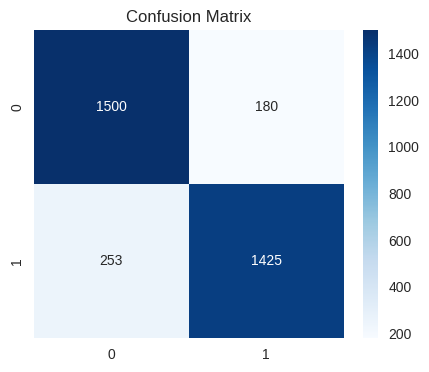



              precision    recall  f1-score   support

           0       0.86      0.89      0.87      1680
           1       0.89      0.85      0.87      1678

    accuracy                           0.87      3358
   macro avg       0.87      0.87      0.87      3358
weighted avg       0.87      0.87      0.87      3358

________________________________________________________________________________


Model: Random Forest Classifier
Accuracy Score: 89%


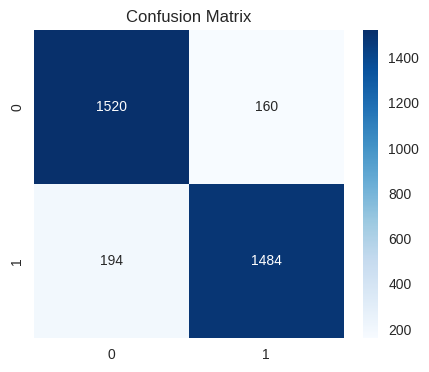



              precision    recall  f1-score   support

           0       0.89      0.90      0.90      1680
           1       0.90      0.88      0.89      1678

    accuracy                           0.89      3358
   macro avg       0.89      0.89      0.89      3358
weighted avg       0.89      0.89      0.89      3358

________________________________________________________________________________


Model: SVC
Accuracy Score: 89%


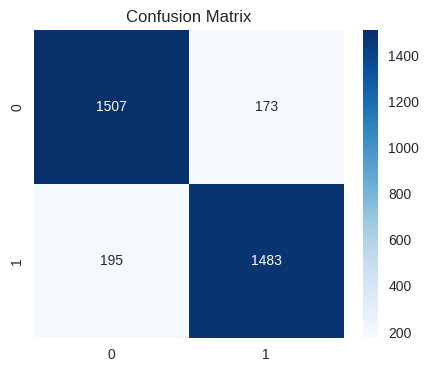



              precision    recall  f1-score   support

           0       0.89      0.90      0.89      1680
           1       0.90      0.88      0.89      1678

    accuracy                           0.89      3358
   macro avg       0.89      0.89      0.89      3358
weighted avg       0.89      0.89      0.89      3358

________________________________________________________________________________


Model: Gradient Boosting Classifier
Accuracy Score: 90%


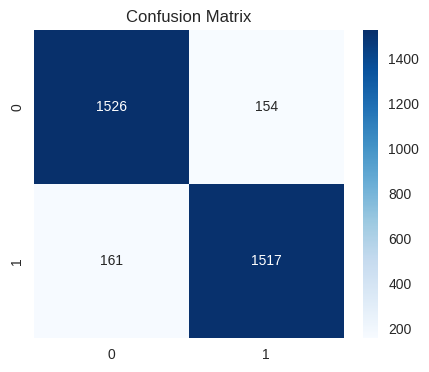



              precision    recall  f1-score   support

           0       0.90      0.91      0.91      1680
           1       0.91      0.90      0.91      1678

    accuracy                           0.91      3358
   macro avg       0.91      0.91      0.91      3358
weighted avg       0.91      0.91      0.91      3358

________________________________________________________________________________




In [70]:
# Run a for loop on the dictionary that contains the different Classification Models
for name, model in models.items():
  # Training model
   model.fit(X_train,y_train)

   # Create Prediction from trained model
   y_pred = model.predict(X_test)

   # Determine the score and confusion matrix
   score = accuracy_score(y_test, y_pred)
   cm = confusion_matrix(y_test, y_pred)

   # Classification report
   report = classification_report(y_test, y_pred)

   # print model name
   print("Model:", name)

   # print accuracy score
   print(f'Accuracy Score: {round(np.floor(score * 100))}%')

   # Create a heatmap showing the confusion
   plt.figure(figsize=(5,4))
   sns.heatmap(cm, fmt='d', cmap='Blues', annot=True)
   plt.title("Confusion Matrix")
   plt.show()

   print('\n')

   # print classification report
   print(report)

   print("_" * 80)
   print('\n')


**Future Prediction With Gradient Boosting Classifier**

In [71]:
# This takes custom values or features and predict its outcome.
def future_prediction():
    data = {
        'gender':[int(input("Gender [0-Female, 1-Male]: "))],
        'age': [int(input('Age: '))],
        'hypertension': [int(input('hypertension [0-No, 1-Yes]: '))],
        'heart_disease': [int(input('Heart Disease [0-No, 1-Yes]: '))],
        'smoking_history': [int(input("Smoking History [0-Never', 1-No Info, 2-Current, 3-Former, 4-Ever, 5-Not Current:] "))],
        'bmi': [float(input('Bmi: '))],
        'HbA1c_level': [float(input('HbA1c_level: '))],
        'blood_glucose_level': [int(input('Blood Glucose Level: '))]
        }

    new_data = pd.DataFrame(data)
    X_new_data = sc.transform(new_data[scaling])
    X_new_data = np.hstack((X_new_data, new_data[['gender', 'hypertension','heart_disease']].values))

    model = GradientBoostingClassifier()
    model.fit(X_train, y_train)
    new_ypred = model.predict(X_new_data)

    return new_ypred[0]

In [75]:
result = future_prediction()

print("_" * 50,"\n")

if result == 1:
  print("Result: Positive")
else:
  print("Result: Negative")

Gender [0-Female, 1-Male]: 1
Age: 80
hypertension [0-No, 1-Yes]: 0
Heart Disease [0-No, 1-Yes]: 1
Smoking History [0-Never', 1-No Info, 2-Current, 3-Former, 4-Ever, 5-Not Current: 0
Bmi: 28
HbA1c_level: 5.6
Blood Glucose Level: 130
__________________________________________________ 

Result: Positive
